**1st Assignment - Pengolahan Citra Digital** <br>
**Farsya Nabila Tori [24/543855/PA/23113]**

## Down Sampling

Berikut dilakukan Down Sampling (Max, Average, Medium) pada suatu gambar yang sama agar diperoleh suatu perbandingan yang setara. Gambar yang digunakan, yakni ![hasil_plot](https://drive.google.com/uc?id=1e51UHRUscYGh_JVRGtffrHkc82B_eVrC)

Down sampling dengan Max selesai. Tersimpan sebagai max_downsampled.jpg
Down sampling dengan Average selesai. Tersimpan sebagai average_downsampled.jpg
Down sampling dengan Median selesai. Tersimpan sebagai median_downsampled.jpg


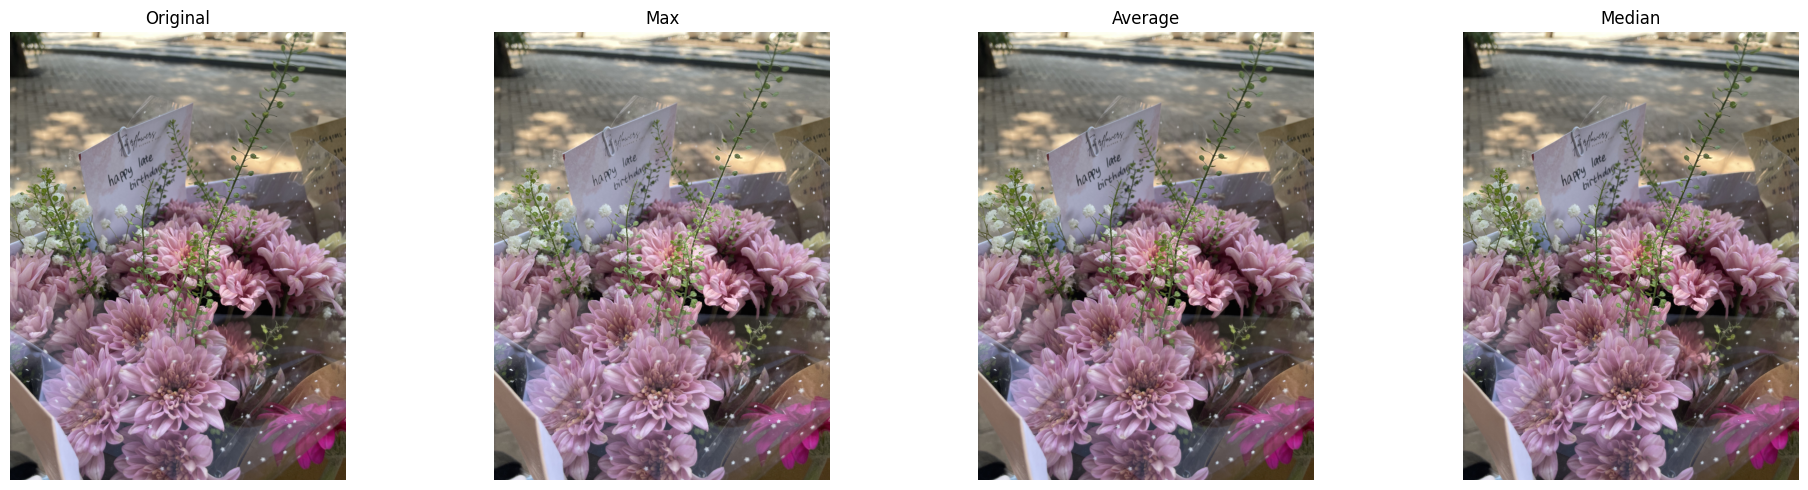

In [39]:
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def down_sampling(image_url, factor, method='max'):
    response = requests.get(image_url)

    if response.status_code != 200:
        print("Gagal mengunduh gambar dari URL.")
        return None

    img = Image.open(BytesIO(response.content))
    img_array = np.array(img)

    h, w, c = img_array.shape
    new_h = h // factor
    new_w = w // factor

    downsampled_array = np.zeros((new_h, new_w, c), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            i_start = i * factor
            j_start = j * factor
            block = img_array[i_start:i_start + factor, j_start:j_start + factor]

            if method == 'max':
                downsampled_array[i, j] = np.max(block, axis=(0, 1))
            elif method == 'average':
                downsampled_array[i, j] = np.mean(block, axis=(0, 1))
            elif method == 'median':
                downsampled_array[i, j] = np.median(block, axis=(0, 1))

    return Image.fromarray(downsampled_array)

if __name__ == "__main__":
    image_file = 'https://drive.google.com/uc?id=1e51UHRUscYGh_JVRGtffrHkc82B_eVrC'
    down_sampling_factor = 4

    response = requests.get(image_file)
    original_img = Image.open(BytesIO(response.content))

    img_max = down_sampling(image_file, down_sampling_factor, 'max')
    img_avg = down_sampling(image_file, down_sampling_factor, 'average')
    img_med = down_sampling(image_file, down_sampling_factor, 'median')

    if img_max and img_avg and img_med:
        img_max.save('max_downsampled.jpg')
        img_avg.save('average_downsampled.jpg')
        img_med.save('median_downsampled.jpg')

        print("Down sampling dengan Max selesai. Tersimpan sebagai max_downsampled.jpg")
        print("Down sampling dengan Average selesai. Tersimpan sebagai average_downsampled.jpg")
        print("Down sampling dengan Median selesai. Tersimpan sebagai median_downsampled.jpg")

        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        titles = ['Original', 'Max', 'Average', 'Median']
        images = [original_img, img_max, img_avg, img_med]

        for ax, img, title in zip(axes, images, titles):
            ax.imshow(img)
            ax.set_title(title)
            ax.axis('off')

        plt.tight_layout()
        plt.savefig('downsampled_comparison.png')
        plt.show()

Hasil down sampling terlampir di dalam repository ini dan dapat dilihat pada file: **max_downsampled.jpg**, **average_downsampled.jpg**, dan **median_downsampled.jpg**.

###Hasil Analisis

Apabila dilihat secara sekilas, perbedaan ketiga gambar hasil down sampling (max, average, median) tidak akan terlihat signifikan. Namun, coba perhatikan ketiganya secara lebih saksama, apabila dibandingkan dengan gambar original, akan didapati bahwa down sampling dengan max menghasilkan warna yang lebih cerah, terutama pada warna pink yang ada pada bunga dan warna hijau pada tangkai daun. Hal ini dapat disebabkan karena dengan metode max, nilai pixel yang digunakan adalah nilai terbesar dari 4x4 pixel (down_sampling_factor = 4). <br> <br> Sementara itu, hasil gambar dengan metode down sampling average dan median tidak terlihat jauh berbeda. Hal ini juga dapat disebabkan karena nilai hasil down sampling dari kedua metode tidak terlalu berbeda jauh. Untuk metode down sampling average, seperti namanya, ia akan mengganti nilai 1x1 pixel dengan mengambil nilai rata-rata dari 4x4 pixel. Sedangkan untuk metode down sampling median, ia akan menggantinya dengan nilai tengah (median) dari pixel-pixel yang dibandingkan. <br> <br> Berdasarkan literatur yang dibaca, beberapa fungsi dari down sampling ini adalah untuk mencegah aliasing (terjadinya noise) sebab dikuranginya laju sampel dari sebuah sinyal dan untuk pengurangan ukuran dataset sehingga proses model training dapat berjalan lebih efisien. Namun, di saat yang sama, apabila mengurangi jumlah pixel dengan tidak hati-hati, jumlah informasi yang hilang akan jauh lebih banyak dari yang seharusnya. Maka dari itu, penting untuk mempelajari bagaimana downsampling dilakukan agar meminimalisasi jumlah informasi yang hilang. <br> Referensi: https://visionbook.mit.edu/upsamplig_downsampling_2.html
<br> <br> Selain itu, untuk penjelasan lebih lanjut terkait hasil median dan average yang terlihat serupa, adalah karena pada gambar original tidak memiliki terlalu banyak noirse atau titik-titik terang yang ekstrem sehingga nilai average dan median dari sebuah blok piksel akan sangat mirip. Meskipun demikian, average lebih sensitif terhadap nilai-nilai ekstrem (pixel yang sangat terang atau gelap), sementara median lebih tahan terhadap outlier karena tidak terpengaruh dengan dengan pixel yang bernilai ekstrem. <br> Referensi: https://www.cl72.org/090imagePLib/books/Gonzales,Woods-Digital.Image.Processing.4th.Edition.pdf

##Up Sampling

Berikut dilakukan Up Sampling (Nearest Neighbor (NN), Bilinear Interpolation (BL), Bicubic Interpolation(BC)) pada suatu gambar yang sama agar diperoleh suatu perbandingan yang setara. Gambar yang digunakan adalah Istana Kebudayaan dan Sains di Warsawa, Polandia, seperti berikut ![Istana Kebudayaan dan Sains](https://drive.google.com/uc?id=1LdOFDsDmtgMWcvY3FQE0CPQK3dLX2_wA)

Up sampling dengan Nearest Neighbor selesai. Tersimpan sebagai nn_upsampled.jpg
Up sampling dengan Bilinear selesai. Tersimpan sebagai bl_upsampled.jpg
Up sampling dengan Bicubic selesai. Tersimpan sebagai bc_upsampled.jpg


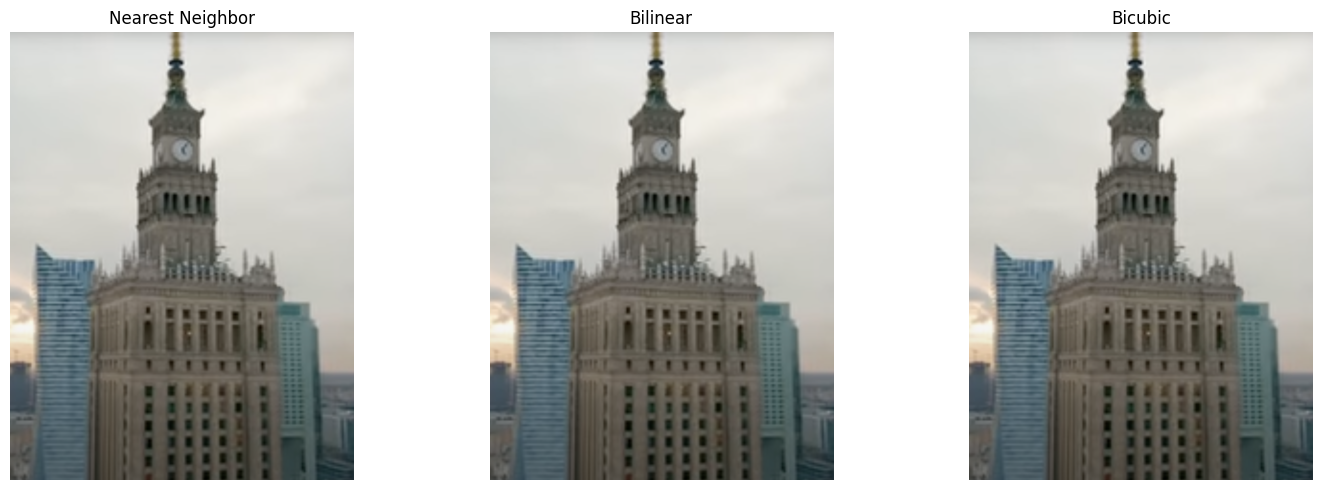

In [40]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def up_sampling(image, factor, method='NN'):
    width, height = image.size
    new_size = (width * factor, height * factor)

    if method == 'NN':
        upsampled_image = image.resize(new_size, Image.Resampling.NEAREST)
    elif method == 'BL':
        upsampled_image = image.resize(new_size, Image.Resampling.BILINEAR)
    elif method == 'BC':
        upsampled_image = image.resize(new_size, Image.Resampling.BICUBIC)

    return upsampled_image

if __name__ == "__main__":
    image_url = 'https://drive.google.com/uc?id=1LdOFDsDmtgMWcvY3FQE0CPQK3dLX2_wA'
    upsampling_factor = 2

    response = requests.get(image_url)
    if response.status_code != 200:
        print("Gagal mengunduh gambar dari URL.")
    else:
        original_img = Image.open(BytesIO(response.content))

        if original_img.mode == 'RGBA':
            original_img = original_img.convert('RGB')

        img_nn = up_sampling(original_img, upsampling_factor, 'NN')
        img_bl = up_sampling(original_img, upsampling_factor, 'BL')
        img_bc = up_sampling(original_img, upsampling_factor, 'BC')

        img_nn.save('nn_upsampled.jpg')
        img_bl.save('bl_upsampled.jpg')
        img_bc.save('bc_upsampled.jpg')

        print("Up sampling dengan Nearest Neighbor selesai. Tersimpan sebagai nn_upsampled.jpg")
        print("Up sampling dengan Bilinear selesai. Tersimpan sebagai bl_upsampled.jpg")
        print("Up sampling dengan Bicubic selesai. Tersimpan sebagai bc_upsampled.jpg")

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        titles = ['Nearest Neighbor', 'Bilinear', 'Bicubic']
        images = [img_nn, img_bl, img_bc]

        for ax, img, title in zip(axes, images, titles):
            ax.imshow(img)
            ax.set_title(title)
            ax.axis('off')

        plt.tight_layout()
        plt.savefig('upsampled_comparison.png')
        plt.show()

Hasil up sampling terlampir di dalam repository ini dan dapat dilihat pada file: **nn_upsampled.jpg**, **bl_upsampled.jpg**, dan **bc_upsampled.jpg**.

### Hasil Analisis

Gambar yang digunakan merupakan gambar yang diambil dari video Youtube dengan resolusi 240p dengan harapan agar perubahan setelah up sampling dapat terlihat lebih jelas sebab resolusinya akan lebih tinggi dengan menaikkan jumlah sampling. Namun mirip seperti down sampling, apabila dilihat sekilas, ketiga gambar hasil up sampling NN, BL, dan BC tidak terlihat berbeda secara signifikan. <br> <br> Secara lebih saksama, metode up sampling NN menghasilkan gambar yang paling pixelated atau kotak-kotak karena ia mengambil nilai pixel terdekat dan menggunakannya untuk mengisi pixel baru tanpa melakukan interpolasi atau perhitungan lanjutan. Sementara itu, up sampling BL dan BC menghasilkan gambar yang dalam kasus ini sedikit menghasilkan warna yang lebih halu meski masih buram secara keseluruhan. Pada metode BL, ia mengambil nilai rata-rata dari 4 pixel (2x2 pixel) terdekat untuk menentukan nilai pixel baru. Sementara BC, ia mengalkulasikan nilai rata-rata dari ring-ring yang telah diberi bobot dan dibentuk di sekitar suatu nilai tertentu, lalu nilai-nilainya akan saling ditambahkan hingga didapat suatu nilai akhir melalui proses pembulatan. <br> <br>
Berdasarkan literatur tertentu, up sampling pada dasarnya adalah proses yang bertujuan untuk menambah jumlah pixel, bukan untuk menciptakan detail baru yang hilang. Berbeda dengan super-resolution yang bukan hanya sekadar menambah pixel, tetapi juga "menebak" dan memulihkan detail resolusi tinggi yang tidak ada pada gambar original. <br> Referensi: https://visionbook.mit.edu/upsamplig_downsampling_2.html <br> <br> Selain itu, up sampling dimanfaatkan dalam peningkatan resolusi spasial citra satelit yang memungkinkan pengguna untuk mendapatkan citra beresolusi sangat tinggi, dengan biaya yang lebih rendah yang sangat penting untuk analisis tata kota, pemantauan lingkungan, atau pertanian. <br> Referensi: https://up42.com/blog/improve-the-spatial-resolution-of-your-images